<a href="https://colab.research.google.com/github/samyamaryal/Computer-Vision/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
len(X_train)

60000

In [17]:
len(X_test)

10000

In [18]:
displayindex = 10

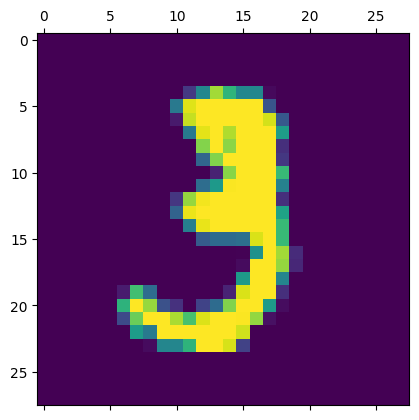

In [19]:
plt.matshow(X_train[displayindex])

In [20]:
print(y_train[displayindex])

3


In [21]:
X_train[displayindex].shape

(28, 28)

# We need to flatten the shape of training and testing datasets into 1-D array. We do that using the .reshape() method from numpy.

In [22]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [26]:
print(X_train.shape, '\n', X_train_flattened.shape)

(60000, 28, 28) 
 (60000, 784)


In [43]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (X_train_flattened.shape[1],), activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [45]:
EPOCHS = 10

In [46]:
model.fit(X_train_flattened, y_train, epochs = EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9296 - accuracy: 0.7528
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5091 - accuracy: 0.8537
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4501 - accuracy: 0.8664
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4343 - accuracy: 0.8688
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4257 - accuracy: 0.8745
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4065 - accuracy: 0.8789
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3875 - accuracy: 0.8839
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3819 - accuracy: 0.8857
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3826 - accuracy: 0.8851
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.384

In [47]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8975


[0.3441918194293976, 0.8974999785423279]